# Double Jet

With various grid resolutions

In [1]:
from gpuocean.SWEsimulators import ModelErrorKL, CDKLM16
from gpuocean.utils import Common, IPythonMagic

from importlib import reload

import numpy as np
import pycuda.driver as cuda
from matplotlib import pyplot as plt

plt.rcParams["image.origin"] = "lower"


In [2]:
%cuda_context_handler gpu_ctx

In [3]:
gpu_stream = cuda.Stream()

In [4]:
import sys, os
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../')))

Get initial arguments from class

In [5]:
from gpuocean.utils import DoubleJetCase

In [6]:
ls = [6, 7, 8, 9]

In [7]:
args_list = []
init_list = []

for l_idx in range(len(ls)):
    doubleJetCase = DoubleJetCase.DoubleJetCase(gpu_ctx, DoubleJetCase.DoubleJetPerturbationType.SteadyState, ny=2**ls[l_idx], nx=2**(ls[l_idx]+1))
    doubleJetCase_args, doubleJetCase_init, _ = doubleJetCase.getInitConditions()

    args_list.append(doubleJetCase_args)
    init_list.append(doubleJetCase_init)

In [8]:
from utils.DoubleJetParametersReplication import * 

In [9]:
etas = []
hus  = []
hvs  = []

for l_idx in range(len(ls)):
    print(l_idx)

    # INIT MODEL ERROR
    grid_args = {"nx" : args_list[l_idx]["nx"],
             "ny" : args_list[l_idx]["ny"],
             "dx" : args_list[l_idx]["dx"],
             "dy" : args_list[l_idx]["dy"],
             "gpu_ctx" : args_list[l_idx]["gpu_ctx"],
             "gpu_stream": gpu_stream,
             "boundary_conditions" : args_list[l_idx]["boundary_conditions"]
             }

    sim_mekl = ModelErrorKL.ModelErrorKL(**grid_args, **sim_model_error_basis_args, xorwow_seed=1, np_seed=1)

    # INIT SIM
    sim = CDKLM16.CDKLM16(**args_list[l_idx], **init_list[l_idx])
    sim.model_error = sim_mekl
    sim.model_time_step = sim_model_error_timestep

    sim.dataAssimilationStep(10*24*3600)

    eta, hu, hv = sim.download(interior_domain_only=True)

    etas.append(eta)
    hus.append(hu)
    hvs.append(hv)

0
1
2
3


In [10]:
# from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
# from mpl_toolkits.axes_grid1.colorbar import colorbar

# fig, axs = plt.subplots(1,4, figsize=(15,2))

#

# for l_idx in range(len(ls)):
#     u = hus[l_idx]/(H + etas[l_idx])
#     v = hvs[l_idx]/(H + etas[l_idx])

#     V = np.sqrt(u**2 + v**2).repeat(2**(len(ls)-1-l_idx),0).repeat(2**(len(ls)-1-l_idx),1)

#     extent = [0, doubleJetCase_args["dx"]*doubleJetCase_args["nx"]/1000, 0, doubleJetCase_args["dy"]*doubleJetCase_args["ny"]/1000]

#     im = axs[l_idx].imshow(V, extent=extent, cmap=plt.cm.Oranges, vmin=0.0, vmax=3.5)
#     axs[l_idx].set_title(r"$"+str(u.shape[1])+r"\times "+str(u.shape[0])+r"$")

# ax_divider = make_axes_locatable(axs[-1])
# ax_cb = ax_divider.append_axes("right", size="5%", pad="15%")
# cbar = colorbar(im, cax=ax_cb)

/home/florianb/miniforge3/envs/gpuocean/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


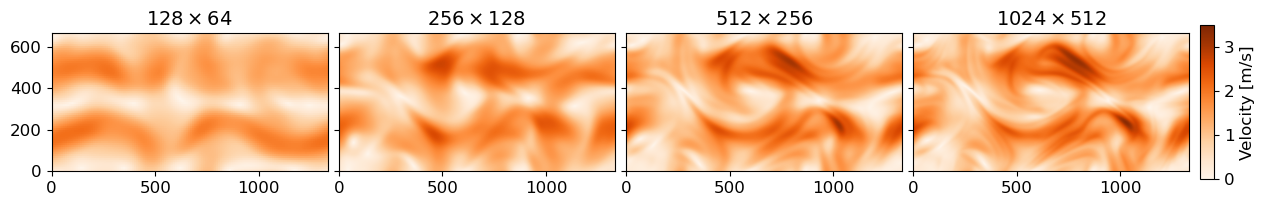

In [11]:
import matplotlib.gridspec as gridspec

# Create a grid for subplots
fig = plt.figure(figsize=(15, 2))
gs = gridspec.GridSpec(1, 5, width_ratios=[1, 1, 1, 1, 0.05], wspace=0.05)

H = doubleJetCase_args["H"][0][0]

for l_idx in range(len(ls)): 
    u = hus[l_idx]/(H + etas[l_idx])
    v = hvs[l_idx]/(H + etas[l_idx])

    V = np.sqrt(u**2 + v**2).repeat(2**(len(ls)-1-l_idx),0).repeat(2**(len(ls)-1-l_idx),1)

    extent = [0, doubleJetCase_args["dx"]*doubleJetCase_args["nx"]/1000, 0, doubleJetCase_args["dy"]*doubleJetCase_args["ny"]/1000]

    ax = plt.subplot(gs[l_idx])
    ax.set_title(r"$"+str(u.shape[1])+r"\times "+str(u.shape[0])+r"$", fontsize=14)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    if l_idx>0:
        ax.set_yticklabels([])
    im = ax.imshow(V, extent=extent, cmap=plt.cm.Oranges, vmin=0.0, vmax=3.5)
    
# Add a colorbar to the rightmost subplot
cax = plt.subplot(gs[-1])
cbar = plt.colorbar(im, cax=cax)
cbar.set_label(label="Velocity [m/s]", size=12)
cbar.ax.tick_params(labelsize=12)

# Adjust layout for better spacing
plt.tight_layout()

plt.savefig("DoubleJet-Resolutions4paper.pdf", bbox_inches="tight", dpi=300)

/home/florianb/miniforge3/envs/gpuocean/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


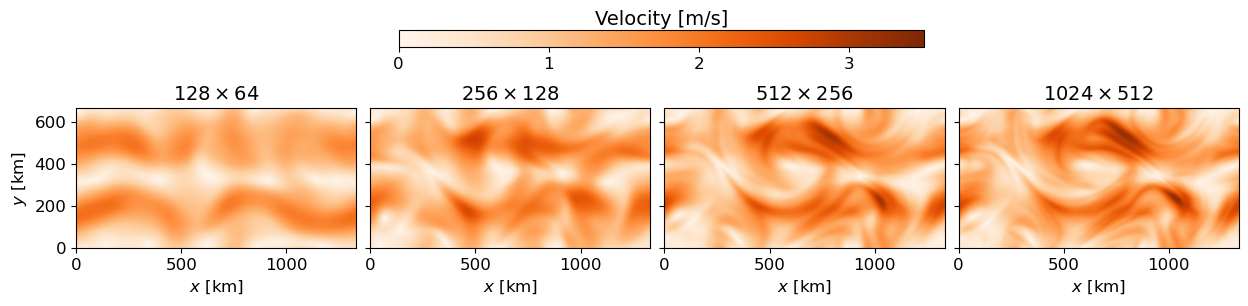

In [17]:
import matplotlib.gridspec as gridspec

# Create a grid for subplots
fig = plt.figure(figsize=(15, 3.25))
gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 1, 1], wspace=0.05)

H = doubleJetCase_args["H"][0][0]

for l_idx in range(len(ls)): 
    u = hus[l_idx]/(H + etas[l_idx])
    v = hvs[l_idx]/(H + etas[l_idx])

    V = np.sqrt(u**2 + v**2).repeat(2**(len(ls)-1-l_idx),0).repeat(2**(len(ls)-1-l_idx),1)

    extent = [0, doubleJetCase_args["dx"]*doubleJetCase_args["nx"]/1000, 0, doubleJetCase_args["dy"]*doubleJetCase_args["ny"]/1000]

    ax = plt.subplot(gs[l_idx])
    ax.set_title(r"$"+str(u.shape[1])+r"\times "+str(u.shape[0])+r"$", fontsize=14)
    ax.set_xlabel(r"$x$ [km]", fontsize=12)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    
    if l_idx>0:
        ax.set_yticklabels([])
    else:
        ax.set_ylabel(r"$y$ [km]", fontsize=12)
    im = ax.imshow(V, extent=extent, cmap=plt.cm.Oranges, vmin=0.0, vmax=3.5)
    

cbar_ax = fig.add_axes([0.34, 0.9, 0.35, 0.05])  # Position and dimensions of the colorbar
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal',  ticks=[0, 1, 2, 3])
cbar.set_label(label="Velocity [m/s]", size=14)#, labelpad=-50)

cbar.ax.xaxis.set_ticks_position('bottom')
cbar.ax.xaxis.set_label_position('top')

cbar.ax.tick_params(labelsize=12)

# Adjust layout for better spacing
plt.tight_layout()

plt.savefig("DoubleJet-Resolutions4paper.pdf", bbox_inches="tight", dpi=300)